In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC


# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state=7)

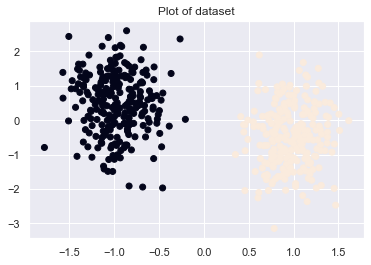

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

In [5]:
from sklearn.decomposition import PCA
from tqdm import tqdm
k = 30
max_accuracy = 0
max_acc_index = 0
accuracies = []
precisions = []
recalls = []
for n in tqdm(range(1, k+1)):
    pc_list = [f'pc{i}' for i in range(n)]
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = pc_list)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # "Linear Support vector classifier"
    model = SVC(kernel='linear', C=1E6)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred)

    acc = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    if acc > max_accuracy:
        max_accuracy = acc
        max_acc_index = n
    # print(f'{n} PC:', acc)
    print(metrics.classification_report(Y_test, Y_pred))
print(f'{max_acc_index}: {max_accuracy}')

  3%|▎         | 1/30 [00:03<01:28,  3.05s/it]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.97      0.80      0.88        40

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



  7%|▋         | 2/30 [00:14<03:47,  8.12s/it]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        74
           1       1.00      0.78      0.87        40

    accuracy                           0.92       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



 10%|█         | 3/30 [00:30<05:19, 11.82s/it]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        74
           1       1.00      0.78      0.87        40

    accuracy                           0.92       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



 13%|█▎        | 4/30 [00:46<05:49, 13.44s/it]

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        74
           1       0.97      0.85      0.91        40

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



 17%|█▋        | 5/30 [01:20<08:39, 20.79s/it]

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        74
           1       0.97      0.85      0.91        40

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



 20%|██        | 6/30 [02:23<14:00, 35.04s/it]

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        74
           1       0.97      0.85      0.91        40

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



 23%|██▎       | 7/30 [03:48<19:38, 51.25s/it]

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.85      0.92        40

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



 27%|██▋       | 8/30 [05:19<23:30, 64.10s/it]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



 30%|███       | 9/30 [07:00<26:27, 75.59s/it]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



 33%|███▎      | 10/30 [09:08<30:34, 91.74s/it]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



 37%|███▋      | 11/30 [10:40<29:07, 91.96s/it]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



 40%|████      | 12/30 [13:09<32:43, 109.07s/it]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.88      0.93        40

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



 43%|████▎     | 13/30 [19:48<55:48, 196.96s/it]

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.85      0.92        40

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



 47%|████▋     | 14/30 [21:09<43:09, 161.87s/it]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.88      0.93        40

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



 50%|█████     | 15/30 [24:10<41:58, 167.89s/it]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



 53%|█████▎    | 16/30 [25:59<34:58, 149.90s/it]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



 57%|█████▋    | 17/30 [28:37<33:03, 152.59s/it]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



 60%|██████    | 18/30 [29:45<25:24, 127.08s/it]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



 63%|██████▎   | 19/30 [35:51<36:25, 198.73s/it]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



 67%|██████▋   | 20/30 [36:59<26:36, 159.65s/it]

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



 70%|███████   | 21/30 [41:21<28:31, 190.18s/it]

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



 73%|███████▎  | 22/30 [42:13<19:49, 148.72s/it]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.97      0.93      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



 77%|███████▋  | 23/30 [42:27<12:39, 108.53s/it]

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



 80%|████████  | 24/30 [42:29<07:38, 76.39s/it] 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



 83%|████████▎ | 25/30 [42:30<04:28, 53.69s/it]

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



 90%|█████████ | 27/30 [42:30<01:19, 26.43s/it]

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.93      0.93      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        74
           1       0.92      0.88      0.90        40

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



100%|██████████| 30/30 [42:31<00:00, 85.04s/it]

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        74
           1       0.92      0.88      0.90        40

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        74
           1       0.95      0.88      0.91        40

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

17: 0.9824561403508

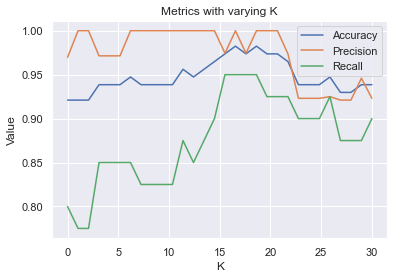

In [13]:
fig, ax = plt.subplots()
indices = np.linspace(0, 30, 30)
ax.plot(indices, accuracies, label='Accuracy')
ax.plot(indices, precisions, label='Precision')
ax.plot(indices, recalls, label='Recall')

ax.set_title('Metrics with varying K')
ax.set_xlabel('K')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
max_acc_index = 17
pca = PCA(n_components=max_acc_index)
principalComponents = pca.fit_transform(X)
pc_list = [f'pc{i}' for i in range(max_acc_index)]
principalDf = pd.DataFrame(data = principalComponents, columns=pc_list)
# print(principalDf.head())

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Creating a classifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
classifier = Perceptron(max_iter=100, eta0=0.1, random_state=0)
#eta0: Constant by which the updates are multiplied.#eta0double, default=1

classifier.fit(X_train, Y_train) #Training the model using classifier
#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, Y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9495 (+/- 0.0513)


In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=Y_train, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on training split")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim)
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

TypeError: scatter() got multiple values for argument 's'